In [161]:
import pandas as pd
import matplotlib.pyplot as plt

In [162]:
movies_df = pd.read_excel("/home/seetvn/random_projects/ekimetrics/data/formatted/movies_formatted.xlsx")
print(movies_df[movies_df['Genre']=='Documentary'])

     Unnamed: 0            Title  Year Rated  imdbVotes  imdbRating  Runtime  \
132         149  What the Health  2017   NaN      30760         7.2       97   

           Genre  BoxOffice  Search Trend  
132  Documentary        NaN        3153.0  


# Correlation between Film Length and Box Office Revenue

In [163]:
correlation = movies_df["Runtime"].corr(movies_df["BoxOffice"])
print(f"Correlation: {correlation}")

Correlation: 0.04918929687075246


# Correlation between IMDB Ratings and Box Office Revenue


In [164]:
correlation = movies_df["imdbRating"].corr(movies_df["BoxOffice"])
print(f"Correlation: {correlation}")

Correlation: 0.2721300248219193


# Correlation between Genre and Box Office Revenue

In [165]:
one_hot_encoding_df = pd.read_excel("/home/seetvn/random_projects/ekimetrics/data/formatted/movies_one_hot_encodings.xlsx")
genre_column_sums = one_hot_encoding_df.iloc[:, 1:20].sum().to_dict()
print(genre_column_sums)

{'Action': 30, 'Adventure': 29, 'Animation': 11, 'Biography': 10, 'Comedy': 49, 'Crime': 23, 'Documentary': 1, 'Drama': 75, 'Family': 6, 'Fantasy': 13, 'History': 4, 'Horror': 22, 'Music': 3, 'Mystery': 19, 'Romance': 18, 'Sci-Fi': 11, 'Sport': 2, 'Thriller': 27, 'War': 3}


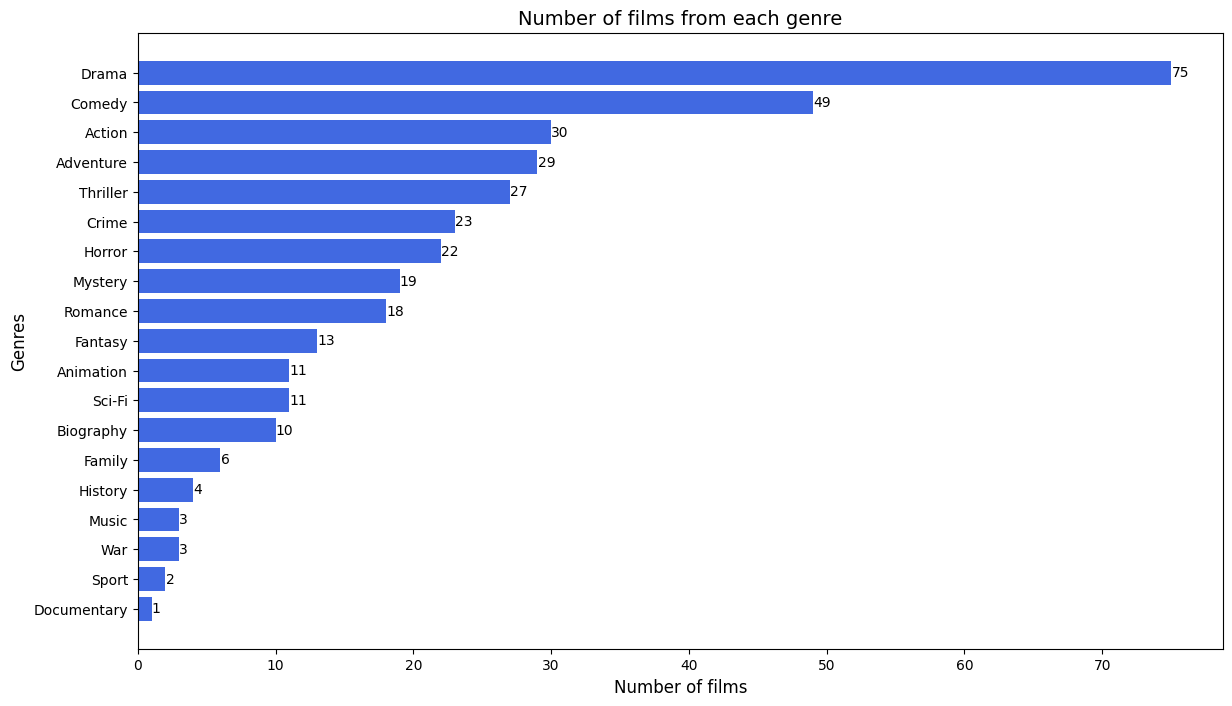

In [166]:
# Sort correlations
sorted_genre_frequency = sorted(genre_column_sums.items(), key=lambda x: x[1],reverse=True)
x_plot = [genre_frequency[0] for genre_frequency in sorted_genre_frequency]
y_plot = [genre_frequency[1] for genre_frequency in sorted_genre_frequency]
plt.figure(figsize=(14, 8))
plt.barh(x_plot, y_plot, color="royalblue")
for i, v in enumerate(y_plot):
    plt.text(v + 0.02, i, f"{v}", va="center", fontsize=10, color="black")


plt.xlabel("Number of films", fontsize=12)
plt.ylabel("Genres", fontsize=12)
plt.title("Number of films from each genre", fontsize=14)
plt.gca().invert_yaxis() 

plt.show()

In [167]:
# Identify genre columns (excluding 'Title', 'imdbRating')
genre_columns = one_hot_encoding_df.columns[1:19] 
correlations = one_hot_encoding_df[genre_columns].corrwith(one_hot_encoding_df["BoxOffice"])
correlations = correlations.sort_values(ascending=False)
print(correlations)

Adventure      0.420204
Animation      0.363773
Action         0.221156
Comedy         0.178904
Fantasy        0.028321
Family        -0.004976
History       -0.028988
Sci-Fi        -0.031892
Sport         -0.050581
Music         -0.055987
Biography     -0.061946
Crime         -0.077105
Horror        -0.094481
Mystery       -0.103713
Romance       -0.128741
Thriller      -0.138258
Drama         -0.245026
Documentary         NaN
dtype: float64


/home/seetvn/random_projects/ekimetrics/venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/seetvn/random_projects/ekimetrics/venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


# Plotted correlation coefficient of each genre

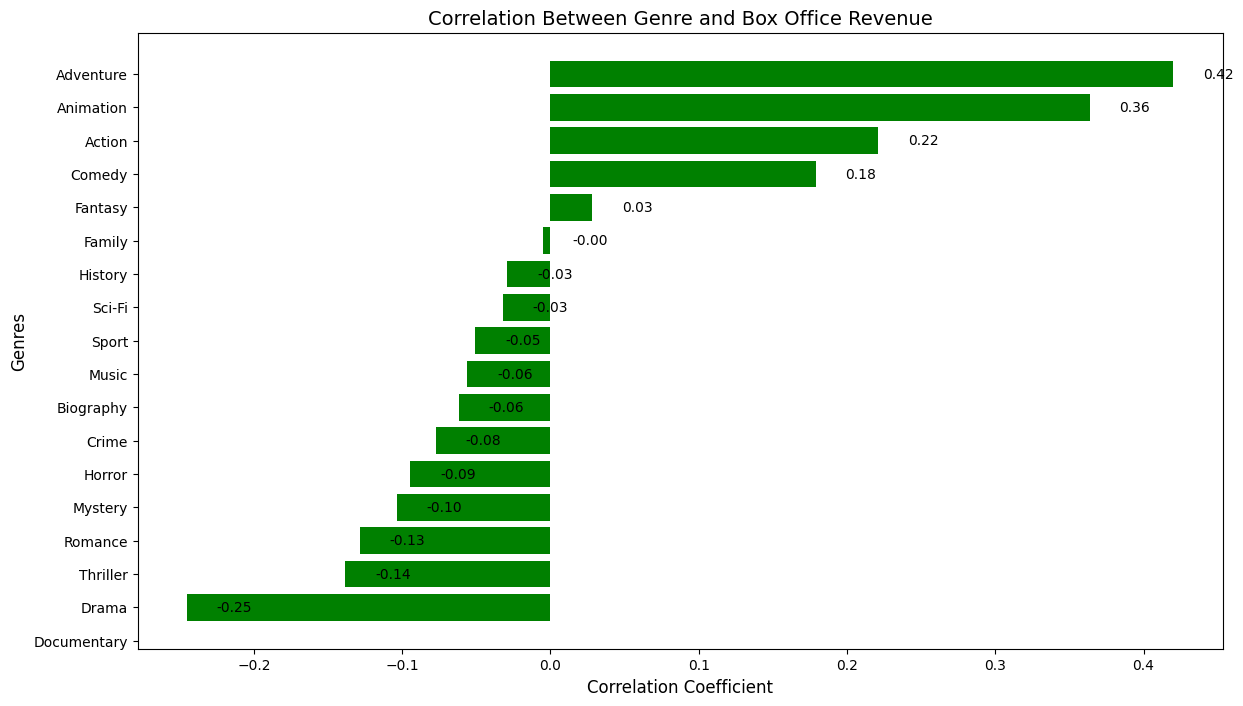

In [168]:

# Sort correlations
sorted_correlations = sorted(correlations.items(), key=lambda x: x[1],reverse=True)
x_plot = [correlation[0] for correlation in sorted_correlations]
y_plot = [correlation[1] for correlation in sorted_correlations]
plt.figure(figsize=(14, 8))
plt.barh(x_plot, y_plot, color="green")
for i, v in enumerate(y_plot):
    plt.text(v + 0.02, i, f"{v:.2f}", va="center", fontsize=10, color="black")

plt.xlabel("Correlation Coefficient", fontsize=12)
plt.ylabel("Genres", fontsize=12)
plt.title("Correlation Between Genre and Box Office Revenue", fontsize=14)
plt.gca().invert_yaxis()  
plt.show()

# Average box office for each genre

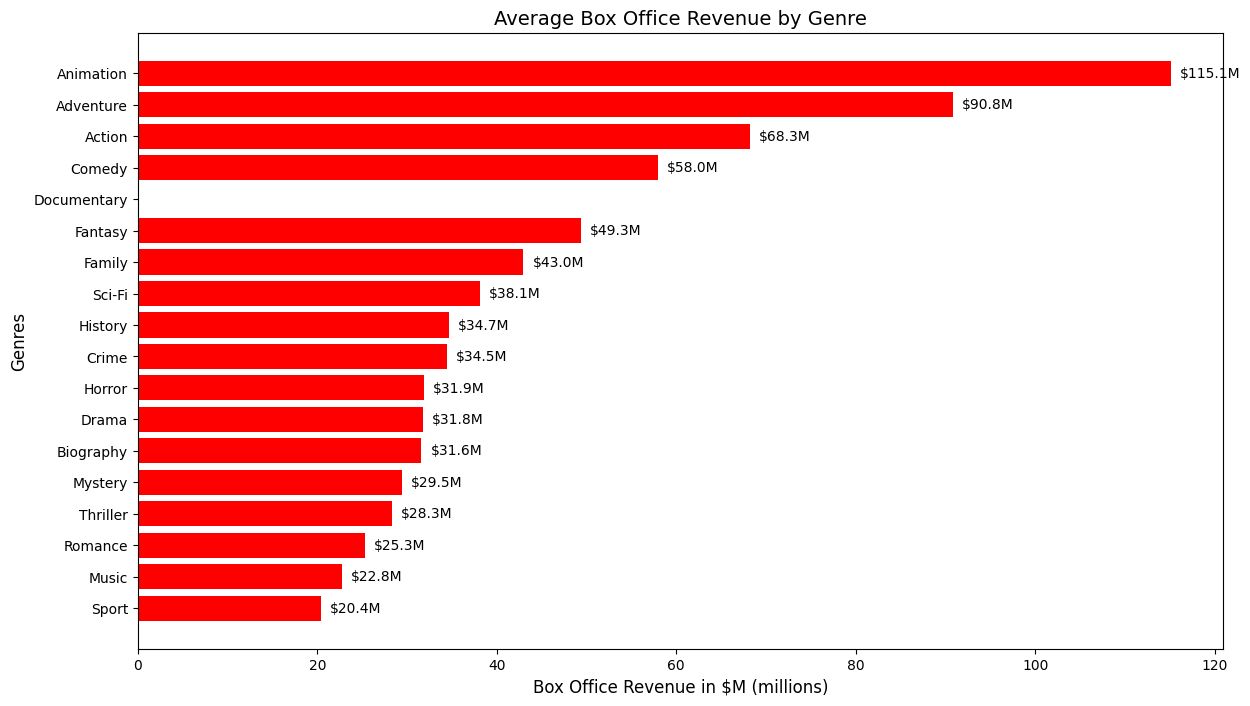

In [169]:
# Compute average BoxOffice for each genre
average_boxoffice_per_genre = {
    genre: float(one_hot_encoding_df.loc[one_hot_encoding_df[genre] == 1, "BoxOffice"].mean())
    for genre in genre_columns
}

sorted_boxoffice = dict(sorted(average_boxoffice_per_genre.items(), key=lambda x: x[1],reverse=True))
# Extract sorted keys and values
x_plot = list(sorted_boxoffice.keys())
y_plot = list(sorted_boxoffice.values())

y_plot_millions = [value / 1e6 for value in y_plot]

plt.figure(figsize=(14, 8))
plt.barh(x_plot, y_plot_millions, color="red")

for i, v in enumerate(y_plot_millions):
    plt.text(v + 1, i, f"${v:,.1f}M", va="center", fontsize=10, color="black")

plt.xlabel("Box Office Revenue in $M (millions)", fontsize=12)
plt.ylabel("Genres", fontsize=12)
plt.title("Average Box Office Revenue by Genre", fontsize=14)
plt.gca().invert_yaxis() 

# Correlation between rating and boxoffice

In [170]:
rated_column_sums = one_hot_encoding_df.iloc[:, 25:].sum().to_dict()
print(rated_column_sums)

{'R': 70, 'Unrated': 8, 'PG': 19, 'G': 3, 'NC-17': 1, 'Approved': 1}


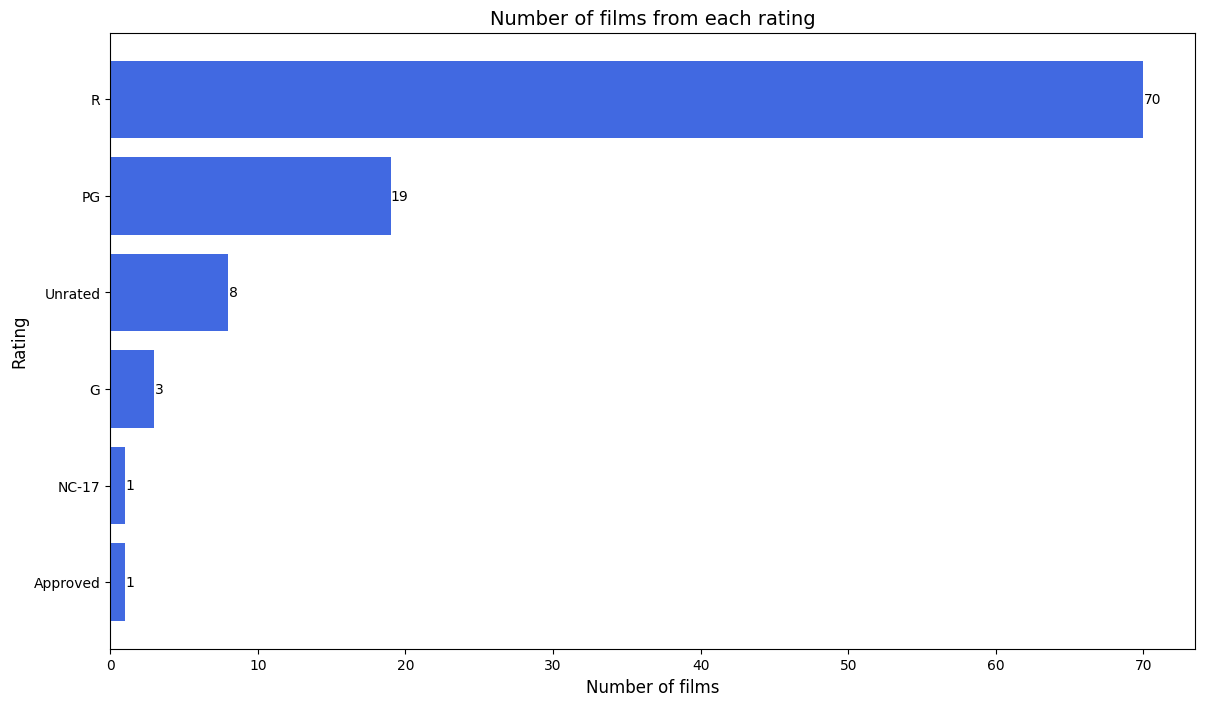

In [171]:
# Sort correlations
sorted_rated_frequency = sorted(rated_column_sums.items(), key=lambda x: x[1],reverse=True)
x_plot = [rated_frequency[0] for rated_frequency in sorted_rated_frequency]
y_plot = [rated_frequency[1] for rated_frequency in sorted_rated_frequency]
plt.figure(figsize=(14, 8))
plt.barh(x_plot, y_plot, color="royalblue")
for i, v in enumerate(y_plot):
    plt.text(v + 0.02, i, f"{v}", va="center", fontsize=10, color="black")


plt.xlabel("Number of films", fontsize=12)
plt.ylabel("Rating", fontsize=12)
plt.title("Number of films from each rating", fontsize=14)
plt.gca().invert_yaxis() 

plt.show()

In [172]:
rated_columns = one_hot_encoding_df.columns[23:]
correlations = one_hot_encoding_df[rated_columns].corrwith(one_hot_encoding_df["BoxOffice"])
correlations = correlations.sort_values(ascending=False)
print(correlations)

PG          0.427455
G           0.140469
PG-13       0.116225
Approved    0.086218
NC-17      -0.060131
Year       -0.090514
Unrated    -0.176787
R          -0.366467
dtype: float64


# Plotted correlation between Rating and IMDBRating

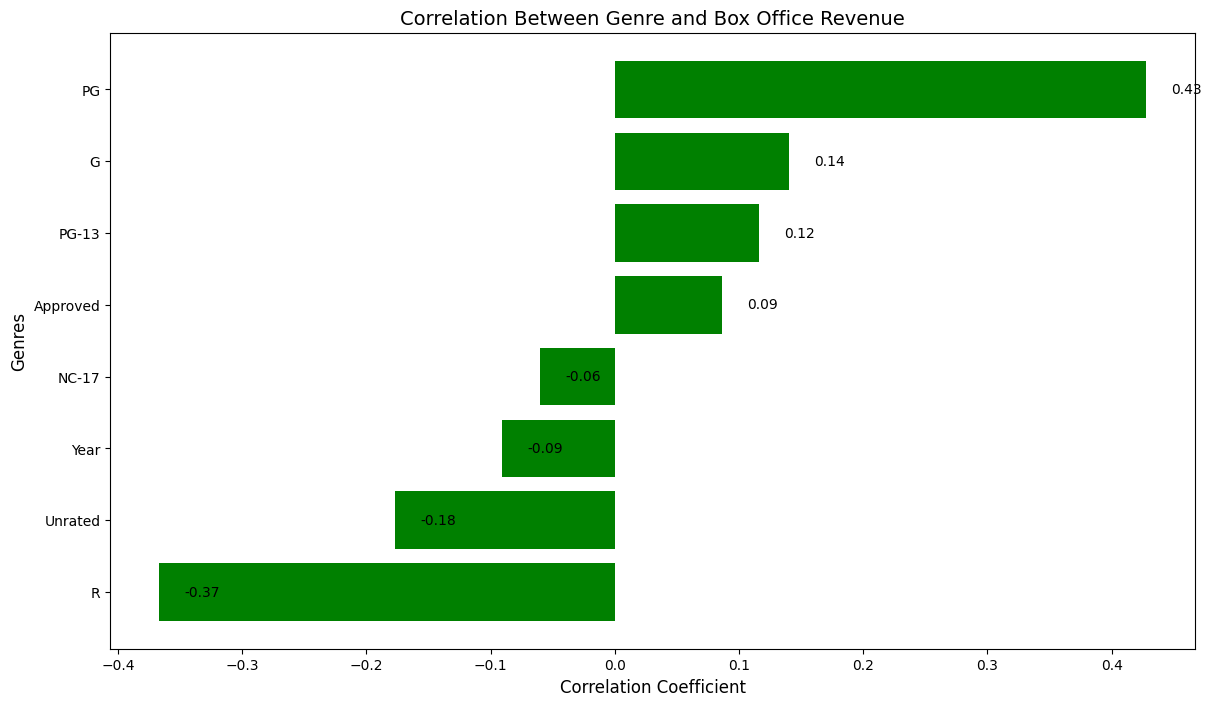

In [173]:
# Sort correlations
sorted_correlations = sorted(correlations.items(), key=lambda x: x[1],reverse=True)
x_plot = [correlation[0] for correlation in sorted_correlations]
y_plot = [correlation[1] for correlation in sorted_correlations]
plt.figure(figsize=(14, 8))
plt.barh(x_plot, y_plot, color="green")
for i, v in enumerate(y_plot):
    plt.text(v + 0.02, i, f"{v:.2f}", va="center", fontsize=10, color="black")


plt.xlabel("Correlation Coefficient", fontsize=12)
plt.ylabel("Genres", fontsize=12)
plt.title("Correlation Between Genre and Box Office Revenue", fontsize=14)
plt.gca().invert_yaxis()  # Highest correlation at the top

plt.show()

# Average boxoffice for each rating

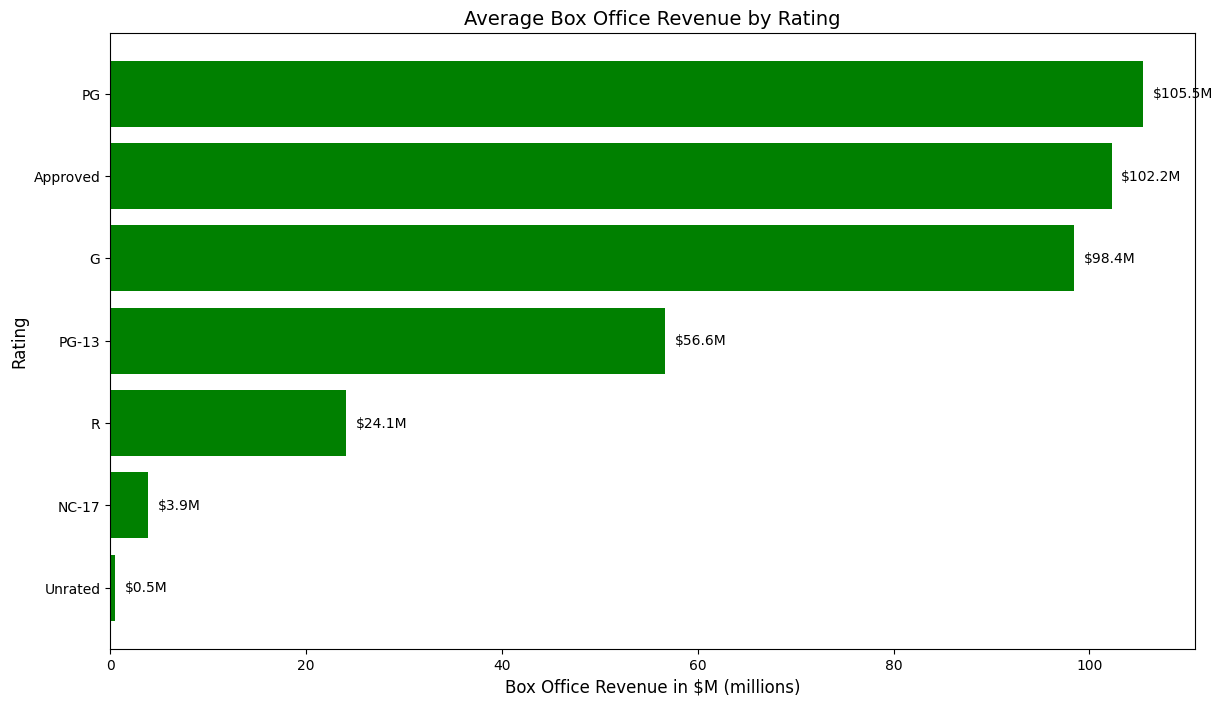

In [174]:
# Compute average BoxOffice for each rating
average_boxoffice_per_rating = {
    rating: float(one_hot_encoding_df.loc[one_hot_encoding_df[rating] == 1, "BoxOffice"].mean())
    for rating in rated_columns
}

sorted_boxoffice = dict(sorted(average_boxoffice_per_rating.items(), key=lambda x: x[1],reverse=True))
# Extract sorted keys and values
x_plot = list(sorted_boxoffice.keys())
y_plot = list(sorted_boxoffice.values())

y_plot_millions = [value / 1e6 for value in y_plot]

plt.figure(figsize=(14, 8))
plt.barh(x_plot, y_plot_millions, color="green")

for i, v in enumerate(y_plot_millions):
    plt.text(v + 1, i, f"${v:,.1f}M", va="center", fontsize=10, color="black")

plt.xlabel("Box Office Revenue in $M (millions)", fontsize=12)
plt.ylabel("Rating", fontsize=12)
plt.title("Average Box Office Revenue by Rating", fontsize=14)
plt.gca().invert_yaxis()